In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import pickle

In [ ]:
df=pd.read_csv('Vehicle Risk Prediction Dataset.csv')

In [ ]:
df.head(30)

,Driver_Age,Driver_Experience,Driver_Awake_Time,Vehicle_Speed_Ratio,Last_Service_Months_Ago,Cargo_Load,Visibility,Light_Conditions,Road_Surface_Conditions,Weather,Road_Type,Landscape,Traffic_Density,Road_Hazards,Time_of_Day,Temperature,Fatigue_Level,Medical_Condition,Speeding,Risk_Score
0,19,1,5.5,1.02,1,88,Good,Day,Dry,Clear,Rural,Forest,Low,NaN,Morning,22,Low,NaN,No,10.4
1,19,1,5.5,1.02,1,88,Good,Day,Dry,Clear,Rural,Forest,Low,NaN,Morning,22,Low,NaN,No,10.4
2,19,1,5.5,1.02,1,88,Good,Day,Dry,Clear,Rural,Forest,Low,NaN,Morning,22,Low,NaN,No,10.4
3,32,3,5.9,1.09,6,167,Good,Day,Dry,Clear,Urban,Urban,Low,NaN,Afternoon,25,Low,NaN,No,14.7
4,32,3,5.9,1.09,6,167,Good,Day,Dry,Clear,Urban,Urban,Low,NaN,Afternoon,25,Low,NaN,No,14.7
5,37,8,7.8,1.29,4,312,Good,Day,Dry,Clear,Urban,Urban,Low,NaN,Afternoon,27,Low,NaN,No,22.4
6,22,2,5.1,1.01,1,78,Good,Day,Dry,Clear,Rural,Fields,Low,NaN,Afternoon,27,Low,NaN,No,11.2
7,28,5,6.4,1.14,3,189,Good,Day,Dry,Clear,Rural,Forest,Low,NaN,Morning,24,Low,NaN,No,15.1
8,28,5,6.4,1.14,3,189,Good,Day,Dry,Clear,Rural,Forest,Low,NaN,Morning,24,Low,NaN,No,15.1
9,28,5,6.4,1.14,3,189,Good,Day,Dry,Clear,Rural,Forest,Low,NaN,Morning,24,Low,NaN,No,15.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Driver_Age               15000 non-null  int64  
 1   Driver_Experience        15000 non-null  int64  
 2   Driver_Awake_Time        15000 non-null  float64
 3   Vehicle_Speed_Ratio      15000 non-null  float64
 4   Last_Service_Months_Ago  15000 non-null  int64  
 5   Cargo_Load               15000 non-null  int64  
 6   Visibility               15000 non-null  object 
 7   Light_Conditions         15000 non-null  object 
 8   Road_Surface_Conditions  15000 non-null  object 
 9   Weather                  15000 non-null  object 
 10  Road_Type                14999 non-null  object 
 11  Landscape                15000 non-null  object 
 12  Traffic_Density          15000 non-null  object 
 13  Road_Hazards             8120 non-null   object 
 14  Time_of_Day           

In [ ]:
df.isnull().sum()

Driver_Age                    0
Driver_Experience             0
Driver_Awake_Time             0
Vehicle_Speed_Ratio           0
Last_Service_Months_Ago       0
Cargo_Load                    0
Visibility                    0
Light_Conditions              0
Road_Surface_Conditions       0
Weather                       0
Road_Type                     1
Landscape                     0
Traffic_Density               0
Road_Hazards               6880
Time_of_Day                   0
Temperature                   0
Fatigue_Level                 0
Medical_Condition          7283
Speeding                      0
Risk_Score                    0
dtype: int64

In [ ]:
df.dropna()

,Driver_Age,Driver_Experience,Driver_Awake_Time,Vehicle_Speed_Ratio,Last_Service_Months_Ago,Cargo_Load,Visibility,Light_Conditions,Road_Surface_Conditions,Weather,Road_Type,Landscape,Traffic_Density,Road_Hazards,Time_of_Day,Temperature,Fatigue_Level,Medical_Condition,Speeding,Risk_Score
33,58,29,11.7,1.67,15,952,Poor,Dark,Icy,Blizzard,Highway,Mountains,High,Debris,Night,-5,High,Asthma,Yes,82.6
34,58,29,11.7,1.67,15,952,Poor,Dark,Icy,Blizzard,Highway,Mountains,High,Debris,Night,-5,High,Asthma,Yes,82.6
36,47,18,9.1,1.48,11,687,Poor,Twilight,Wet,Rainy,Highway,Hilly,High,Potholes,Evening,10,High,Asthma,Yes,67.4
37,59,35,9.8,1.76,15,934,Poor,Twilight,Wet,Rainy,Highway,Hilly,High,Animals,Morning,12,High,Diabetes,Yes,86.7
39,42,13,8.5,1.41,9,567,Poor,Twilight,Wet,Rainy,Highway,Desert,High,Potholes,Evening,12,High,Arthritis,Yes,64.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14989,55,31,8.7,1.58,14,813,Poor,Twilight,Slippery,Blizzard,Highway,Forest,High,Potholes,Night,0,High,Asthma,Yes,83.8
14995,57,33,9.1,1.70,14,874,Moderate,Dawn,Wet,Foggy,Rural Road,Desert,Medium,Potholes,Day,20,Moderate,Diabetes,Yes,77.6
14996,42,13,8.5,1.41,9,567,Poor,Twilight,Wet,Rainy,Highway,Forest,High,Potholes,Evening,12,High,Heart Disease,Yes,64.2
14998,71,47,11.9,2.04,18,1184,Poor,Twilight,Slippery,Blizzard,Highway,Forest,High,Animals,Night,-10,High,Heart Disease,Yes,99.3


In [ ]:
df.describe()

,Driver_Age,Driver_Experience,Driver_Awake_Time,Vehicle_Speed_Ratio,Last_Service_Months_Ago,Cargo_Load,Temperature,Risk_Score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,48.389067,23.772267,8.986387,1.547168,10.817200,674.449800,10.595600,60.273887
std,16.997746,16.398957,2.124968,0.341718,5.894537,376.398217,11.586478,32.300970
min,19.000000,1.000000,5.100000,1.010000,1.000000,78.000000,-15.000000,10.400000
25%,32.000000,7.000000,7.100000,1.220000,5.000000,283.000000,0.000000,22.600000
50%,54.000000,27.000000,9.100000,1.620000,13.000000,842.000000,15.000000,75.200000
75%,62.000000,38.000000,10.800000,1.820000,16.000000,973.000000,18.000000,90.100000
max,76.000000,52.000000,12.900000,2.170000,19.000000,1260.000000,27.000000,103.100000


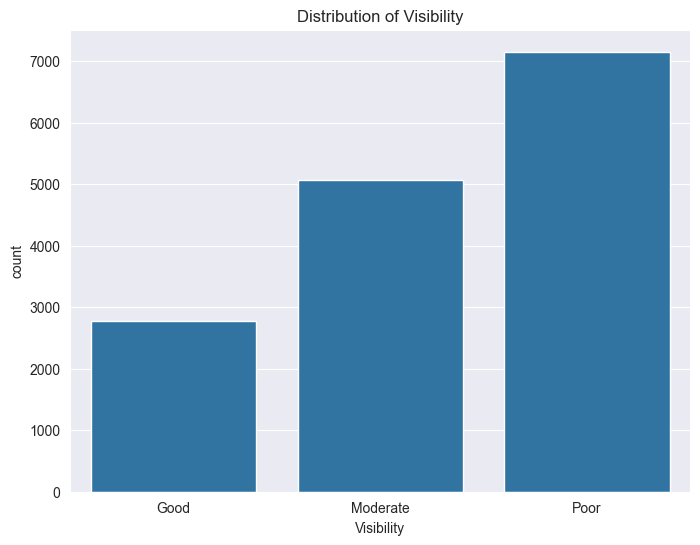

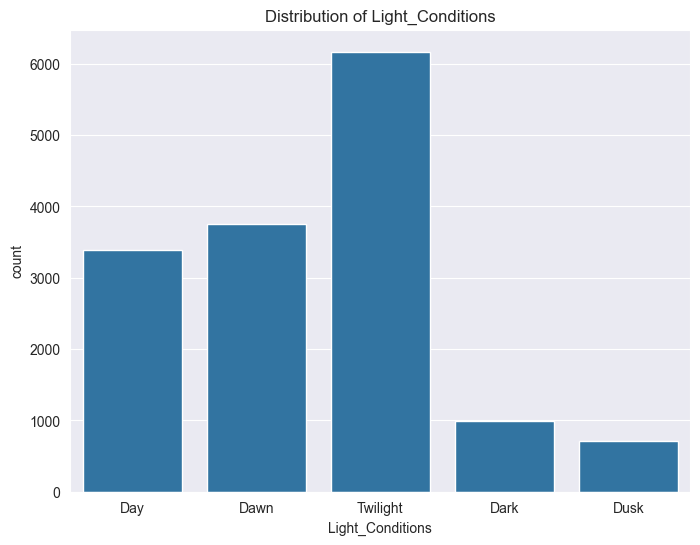

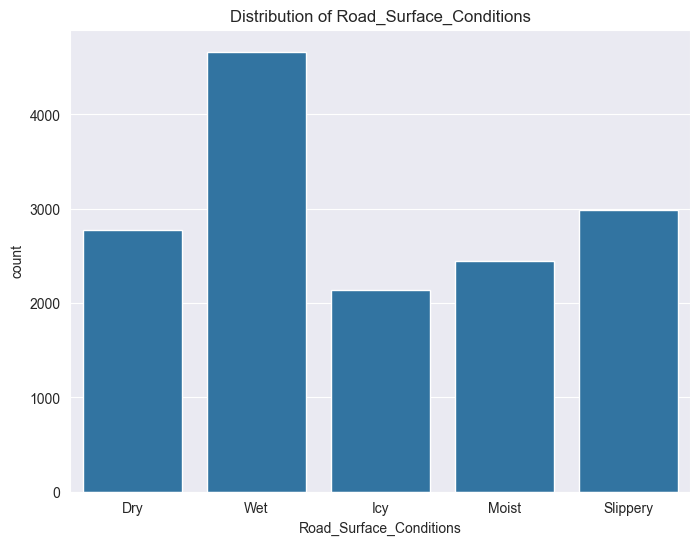

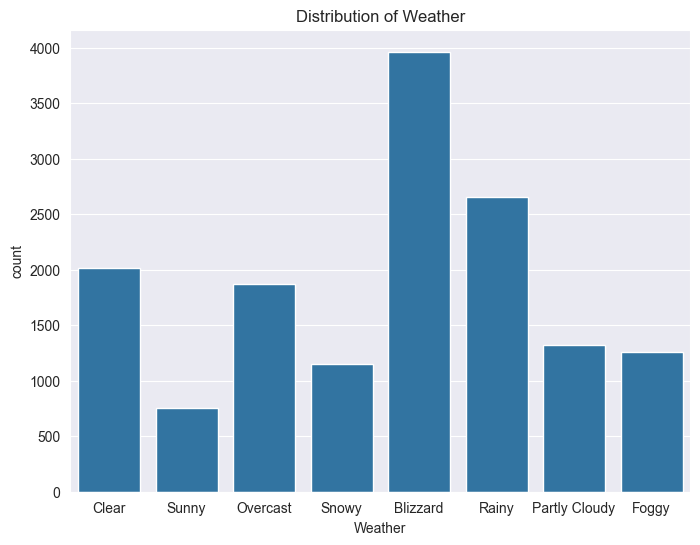

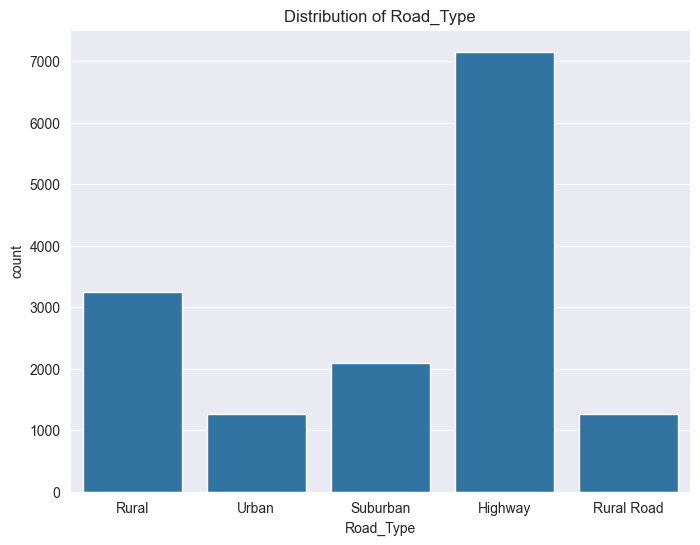

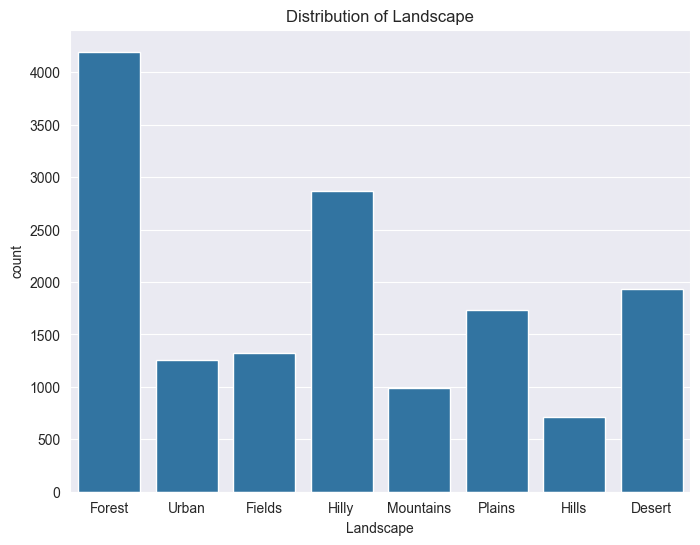

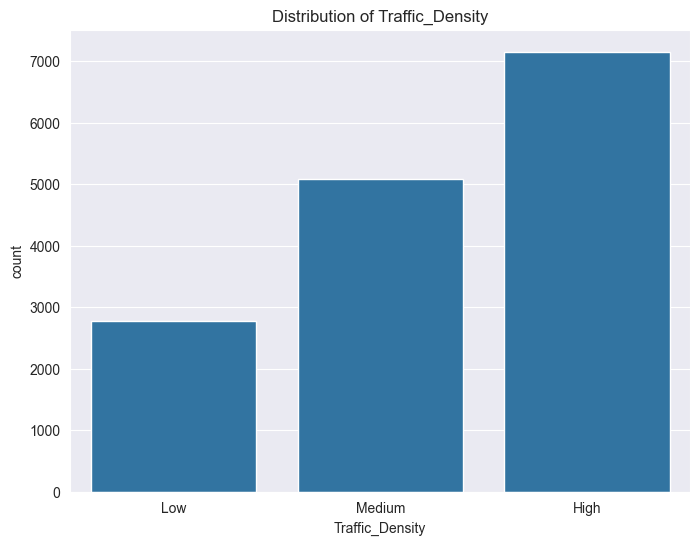

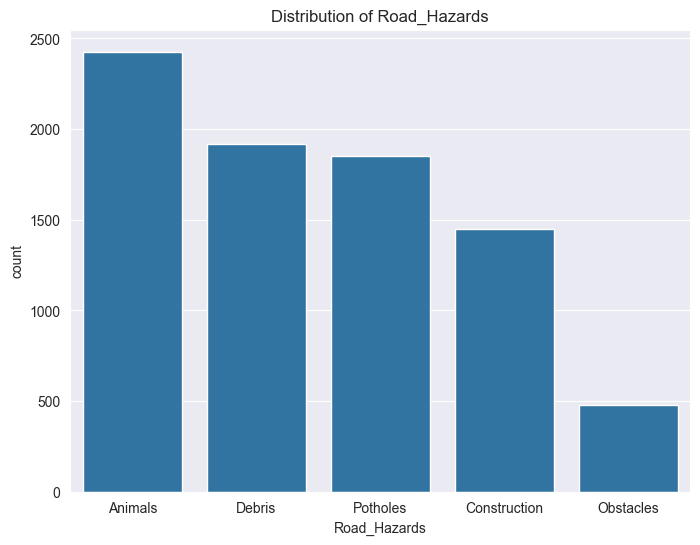

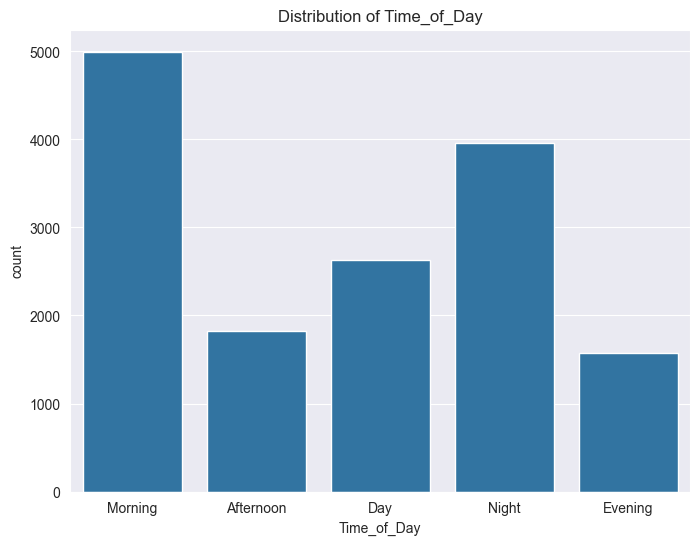

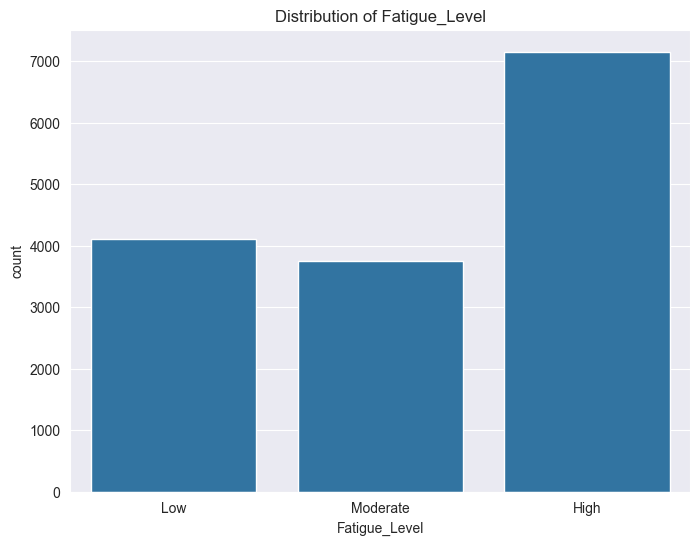

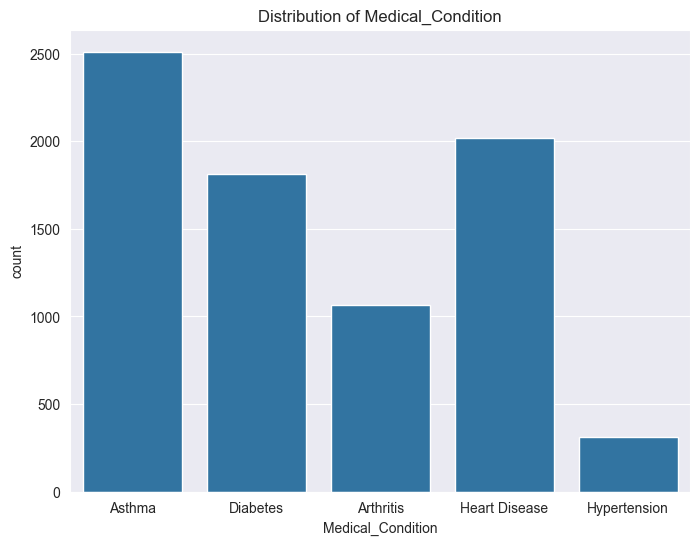

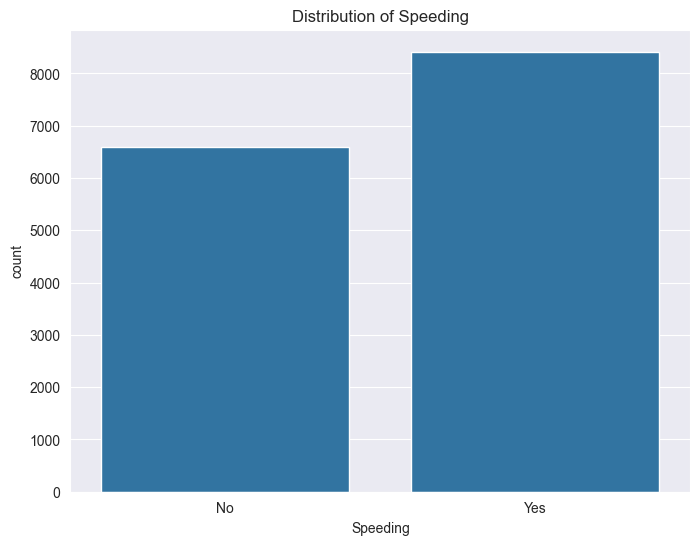

In [ ]:
categorical_features = df.select_dtypes(include=[object, 'category']).columns.tolist()
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

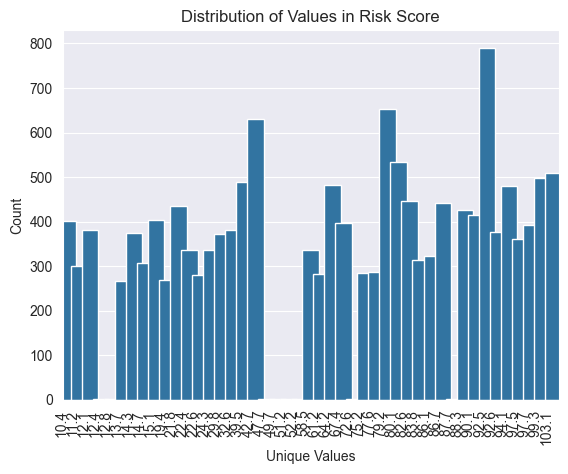

In [ ]:
sns.countplot(x='Risk_Score', data=df,width=1.5)
plt.xticks(rotation=90, ha='right')
plt.title('Distribution of Values in Risk Score')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.show()

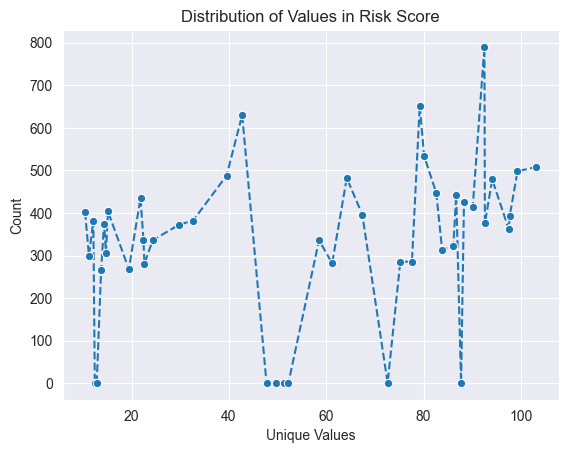

In [ ]:
value_counts = df['Risk_Score'].value_counts().sort_index()
sns.lineplot(x=value_counts.index, y=value_counts.values, marker='o', linestyle='--')
plt.title('Distribution of Values in Risk Score')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.show()

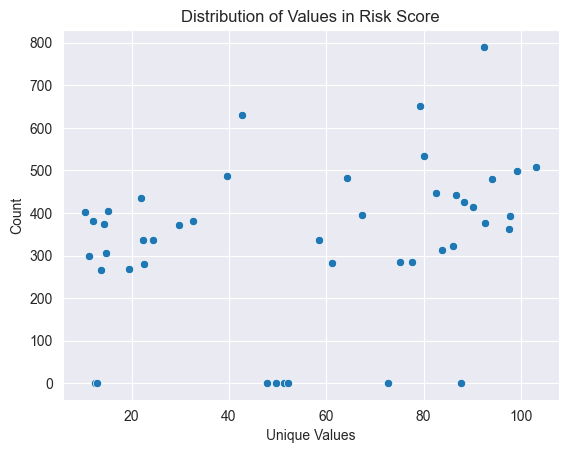

In [ ]:
value_counts = df['Risk_Score'].value_counts().sort_index()
sns.scatterplot(x=value_counts.index, y=value_counts.values)
plt.title('Distribution of Values in Risk Score')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.show()

In [ ]:
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le


In [ ]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
df.drop(['Vehicle_Speed_Ratio','Light_Conditions','Medical_Condition','Landscape','Road_Surface_Conditions'], axis=1, inplace=True)
df.head()

,Driver_Age,Driver_Experience,Driver_Awake_Time,Last_Service_Months_Ago,Cargo_Load,Visibility,Weather,Road_Type,Traffic_Density,Road_Hazards,Time_of_Day,Temperature,Fatigue_Level,Speeding,Risk_Score
0,-1.729056,-1.388687,-1.640732,-1.665530,-1.558109,-1.702445,-0.756686,-0.100430,0.15526,0.897038,0.409597,0.984318,0.276529,-1.130444,-1.544088
1,-1.729056,-1.388687,-1.640732,-1.665530,-1.558109,-1.702445,-0.756686,-0.100430,0.15526,0.897038,0.409597,0.984318,0.276529,-1.130444,-1.544088
2,-1.729056,-1.388687,-1.640732,-1.665530,-1.558109,-1.702445,-0.756686,-0.100430,0.15526,0.897038,0.409597,0.984318,0.276529,-1.130444,-1.544088
3,-0.964223,-1.266724,-1.452488,-0.817259,-1.348218,-1.702445,-0.756686,2.103049,0.15526,0.897038,-1.791487,1.243249,0.276529,-1.130444,-1.410961
4,-0.964223,-1.266724,-1.452488,-0.817259,-1.348218,-1.702445,-0.756686,2.103049,0.15526,0.897038,-1.791487,1.243249,0.276529,-1.130444,-1.410961


In [ ]:
X = df.drop(['Risk_Score'], axis=1)
y = df['Risk_Score']

In [ ]:
X.head()

,Driver_Age,Driver_Experience,Driver_Awake_Time,Last_Service_Months_Ago,Cargo_Load,Visibility,Weather,Road_Type,Traffic_Density,Road_Hazards,Time_of_Day,Temperature,Fatigue_Level,Speeding
0,-1.729056,-1.388687,-1.640732,-1.665530,-1.558109,-1.702445,-0.756686,-0.100430,0.15526,0.897038,0.409597,0.984318,0.276529,-1.130444
1,-1.729056,-1.388687,-1.640732,-1.665530,-1.558109,-1.702445,-0.756686,-0.100430,0.15526,0.897038,0.409597,0.984318,0.276529,-1.130444
2,-1.729056,-1.388687,-1.640732,-1.665530,-1.558109,-1.702445,-0.756686,-0.100430,0.15526,0.897038,0.409597,0.984318,0.276529,-1.130444
3,-0.964223,-1.266724,-1.452488,-0.817259,-1.348218,-1.702445,-0.756686,2.103049,0.15526,0.897038,-1.791487,1.243249,0.276529,-1.130444
4,-0.964223,-1.266724,-1.452488,-0.817259,-1.348218,-1.702445,-0.756686,2.103049,0.15526,0.897038,-1.791487,1.243249,0.276529,-1.130444


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

# Parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.05,
    'max_depth': 4,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'alpha': 0.5,
    'lambda': 0.5,
    'seed': 42
}

# Train the model using xgb.train with early stopping
xgb_regressor = xgb.train(
    params,
    train_data,
    num_boost_round=200,             # Number of boosting rounds (trees)
    evals=[(test_data, 'validation')],  # Validation set for early stopping
    early_stopping_rounds=10,        # Stop if no improvement after 10 rounds
    verbose_eval=False
)


In [ ]:
# Predict on training and test data
y_train_pred = xgb_regressor.predict(train_data)
y_test_pred = xgb_regressor.predict(test_data)

# Evaluate the model performance on training and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
# Print results for comparison
print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R-squared: {r2_train}")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R-squared: {r2_test}")

Training Mean Squared Error: 9.921759895052388e-05
Training R-squared: 0.9999011511882827
Test Mean Squared Error: 0.0005903464149360807
Test R-squared: 0.9994005672944964


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming X_train, X_test, y_train, and y_test are already defined
# Example of loading the dataset
# data = pd.read_csv('/mnt/data/Vehicle Risk Prediction Dataset.csv')
# X = data.drop('target_column', axis=1)
# y = data['target_column']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression
modell = LinearRegression()
modell.fit(X_train, y_train)
predictions = modell.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Linear Regression - MSE: {mse}, R²: {r2}')

# 2. Decision Tree Regressor
modell = DecisionTreeRegressor()
modell.fit(X_train, y_train)
predictions = modell.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Decision Tree Regressor - MSE: {mse}, R²: {r2}')

# 3. Random Forest Regressor
modell = RandomForestRegressor(n_estimators=100, random_state=42)
modell.fit(X_train, y_train)
predictions = modell.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Random Forest Regressor - MSE: {mse}, R²: {r2}')

# 4. Gradient Boosting Regressor
modell = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
modell.fit(X_train, y_train)
predictions = modell.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Gradient Boosting Regressor - MSE: {mse}, R²: {r2}')

# 5. XGBoost Regressor
modell = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
modell.fit(X_train, y_train)
predictions = modell.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'XGB Regressor - MSE: {mse}, R²: {r2}')

# 6. Lasso Regression
modell = Lasso(alpha=0.1)
modell.fit(X_train, y_train)
predictions = modell.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Lasso Regression - MSE: {mse}, R²: {r2}')

# 7. Ridge Regression
modell = Ridge(alpha=0.5)
modell.fit(X_train, y_train)
predictions = modell.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Ridge Regression - MSE: {mse}, R²: {r2}')

# 8. ElasticNet Regression
modell = ElasticNet(alpha=0.1, l1_ratio=0.7)
modell.fit(X_train, y_train)
predictions = modell.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'ElasticNet Regression - MSE: {mse}, R²: {r2}')

# 9. KNN Regressor
modell = KNeighborsRegressor(n_neighbors=5)
modell.fit(X_train, y_train)
predictions = modell.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'KNN Regressor - MSE: {mse}, R²: {r2}')


Linear Regression - MSE: 0.002641470201118453, R²: 0.9973178737278605
Decision Tree Regressor - MSE: 0.00075259299546788, R²: 0.9992358235029425
Random Forest Regressor - MSE: 0.0006077903937695752, R²: 0.9993828548274393
Gradient Boosting Regressor - MSE: 0.0006211177432491663, R²: 0.9993693223506533
XGB Regressor - MSE: 0.0004611455758997699, R²: 0.9995317567224957
Lasso Regression - MSE: 0.020373607518003423, R²: 0.9793128130087717
Ridge Regression - MSE: 0.002635400526137484, R²: 0.9973240368239739
ElasticNet Regression - MSE: 0.013954355367762964, R²: 0.985830866792743
KNN Regressor - MSE: 0.0011999542428014877, R²: 0.9987815767148839


In [ ]:
import plotly.express as px
import pandas as pd

# Define data
data = {
    'Algorithm': [
        'Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 
        'Gradient Boosting Regressor', 'XGB Regressor', 'Lasso Regression', 
        'Ridge Regression', 'ElasticNet Regression', 'KNN Regressor'
    ],
    'MSE': [
        0.002911931774375335, 0.0008816726908654058, 0.000729368702225619, 
        0.0006718280413980112, 0.0006252016809322829, 0.020373617040169118, 
        0.0029064517892096625, 0.014822436703453604, 0.0011810686053480436
    ],
    'R2': [
        0.9970432493573379, 0.9991047570831589, 0.9992594052518604, 
        0.9993178315472079, 0.9993651755552252, 0.979312803340046, 
        0.9970488136874514, 0.9849494244218149, 0.9988007530297855
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a scatter plot for MSE
fig_mse = px.scatter(
    df, x='Algorithm', y='MSE', 
    hover_name='Algorithm', title="MSE Scores for Regression Algorithms",
    labels={'MSE': 'Mean Squared Error', 'Algorithm': 'Algorithms'}
)

# Create a scatter plot for R²
fig_r2 = px.scatter(
    df, x='Algorithm', y='R2', 
    hover_name='Algorithm', title="R² Scores for Regression Algorithms",
    labels={'R2': 'R² Score', 'Algorithm': 'Algorithms'}
)

# Update layout to ensure names don't appear in the plotting area
fig_mse.update_traces(marker=dict(size=12, color='blue'))
fig_r2.update_traces(marker=dict(size=12, color='green'))

# Display plots
fig_mse.show()
fig_r2.show()


In [ ]:
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
xgb_regressor.save_model("xgboost_model.json")

In [ ]:
import uvicorn
from fastapi import FastAPI
from pydantic import BaseModel
import xgboost as xgb
import pickle
import numpy as np
import nest_asyncio
nest_asyncio.apply()


# Initialize FastAPI app
app = FastAPI()

# Load the model and preprocessing objects
with open('label_encoders.pkl', 'rb') as file:
    label_encoders = pickle.load(file)
    
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Load the trained XGBoost model
xgb_regressor = xgb.Booster()
xgb_regressor.load_model("xgboost_model.json")

# Define input data structure
class PredictionInput(BaseModel):
    feature1: float
    feature2: float
    # Add other features here

# Prediction endpoint
@app.post("/predict")
def predict(input_data: PredictionInput):
    # Prepare input data
    data = np.array([[input_data.feature1, input_data.feature2]])  # and others

    # Apply scaling and encoding as necessary
    data = scaler.transform(data)

    # Convert to DMatrix for XGBoost prediction
    dmatrix = xgb.DMatrix(data)

    # Get prediction
    prediction = xgb_regressor.predict(dmatrix)
    return {"risk_score": prediction[0]}

# Run the FastAPI app
if __name__ == "__main__":
    uvicorn.run(app, host="0.0.0.0", port=8000)

import uvicorn

uvicorn.run(app, host="0.0.0.0", port=8000)

INFO:     Started server process [32496]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [32496]


KeyboardInterrupt: 